In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
%matplotlib inline
inFile = 'http://ww2.amstat.org/publications/jse/datasets/babyboom.dat.txt'
data = pd.read_csv(inFile, sep='[ ]*', header=None, engine='python',names= ['TOB', 'sex', 'Weight', 'Minutes'])
# Eliminate "Minutes", since this is redundant
df = data[['Minutes', 'sex', 'Weight']]

In [14]:
df.head()

,Minutes,sex,Weight
0,5,1,3837
1,64,1,3334
2,78,2,3554
3,115,2,3838
4,177,2,3625


In [15]:
df.shape

(44, 3)

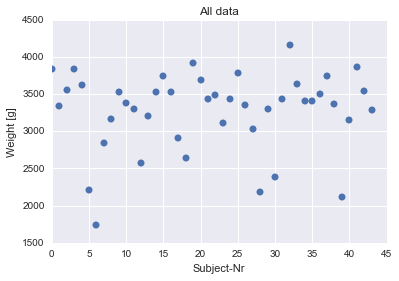

In [17]:
# Show the data: first all of them ....
plt.plot(df.Weight, 'o')
plt.title('All data')
plt.xlabel('Subject-Nr')
plt.ylabel('Weight [g]')
plt.show()

In [21]:
# To make the plots easier to read, replace "1/2" with "female/male"
df.sex = df.sex.replace([1,2], ['female', 'male'])

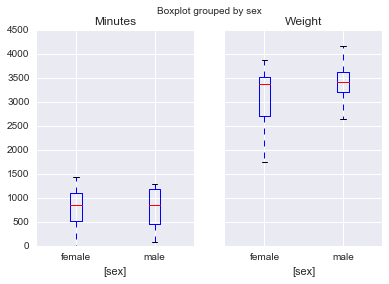

In [24]:
# ... then show the grouped plots
df.boxplot(by='sex')
plt.show()

In [26]:
# Display statistical information numerically
grouped = df.groupby('sex')
print(grouped.describe())

                  Minutes       Weight
sex                                   
female count    18.000000    18.000000
       mean    773.000000  3132.444444
       std     446.050775   631.582534
       min       5.000000  1745.000000
       25%     507.750000  2711.000000
       50%     846.500000  3381.000000
       75%    1094.250000  3517.250000
       max    1435.000000  3866.000000
male   count    26.000000    26.000000
       mean    799.615385  3375.307692
       std     402.687281   428.046051
       min      78.000000  2121.000000
       25%     464.250000  3198.000000
       50%     849.500000  3404.000000
       75%    1177.500000  3628.750000
       max    1283.000000  4162.000000


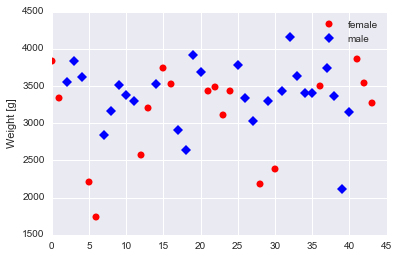

In [29]:
# This is a bit fancier: scatter plots, with labels and individual symbols
symbols = ['o', 'D']
colors = ['r', 'b']
fig = plt.figure()
ax = fig.add_subplot(111)
# "enumerate" provides a counter, and variables can be assigned names in one step if
# the "for"-loop uses a tuple as input for each loop:
for (ii, (sex, group)) in enumerate(grouped):
    ax.plot(group['Weight'], marker = symbols[ii], linewidth=0, color = colors[ii], label=sex)
ax.legend()
ax.set_ylabel('Weight [g]')
plt.show()

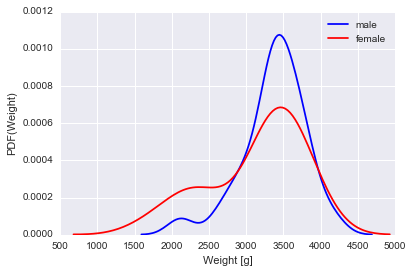

In [31]:
# Fancy finish: a kde-plot
df.Weight = np.double(df.Weight) # kdeplot requires doubles
sns.kdeplot(grouped.get_group('male').Weight, color='b', label='male')
plt.hold(True)
sns.kdeplot(grouped.get_group('female').Weight, color='r', label='female')
plt.xlabel('Weight [g]')
plt.ylabel('PDF(Weight)')
plt.show()

In [32]:
# Statistics: are the data normally distributed?
def isNormal(data, dataType):
    '''Check if the data are normally distributed'''
    alpha = 0.05
    (k2, pVal) = stats.normaltest(data)
    if pVal < alpha:
        print('{0} are NOT normally distributed.'.format(dataType))
    else:
        print('{0} are normally distributed.'.format(dataType))

In [34]:
isNormal(grouped.get_group('male').Weight, 'male')
isNormal(grouped.get_group('female').Weight, 'female')

male are NOT normally distributed.
female are normally distributed.
